# PyTorch
Leonardo Sanches


https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook

## Instalacao

* Em um Ubuntu 18.04, Faca as seguintes instalacoes

### CUDA 10.2
> wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin

> sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600

> wget http://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb

> sudo dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb

> sudo apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub

> sudo apt-get update

> sudo apt-get -y install cuda


### PyTorch 

> conda install pytorch torchvision cudatoolkit=10.2 -c pytorch


In [2]:
import numpy as np
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

ImportError: No module named torch

## Matrizes

* Matrizes em Pytorch são chamadas de Tensores
* Uma matriz 3x3 é um tensor 3x3

In [2]:
array = [[1, 2, 3,], [4, 5, 6]]
tensor = torch.Tensor(array)
print('Tipo do Array: {}' .format(tensor.type))
print('Formato do Array: {}'.format(tensor.shape))
print(tensor)

Tipo do Array: <built-in method type of Tensor object at 0x7f049ce86240>
Formato do Array: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## Variáveis

* Variáveis geram gradientes
* Para criarmos BackwardPropagarion precisamos de variaveis

In [3]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

### Backward Propagation

* Seja: $ y = x^2$
* Se $ x = [2,4] $, então $ y = [4, 16]$
* A equação de Recap: $ o = (1 / 2) * sum(y) $


In [4]:
array =[2, 4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad=True)
y = x**2

o = (1/2)*sum(y)
print('o = ', o)

o.backward()
print('gradientes: ', x.grad)

o =  tensor(10., grad_fn=<MulBackward0>)
gradientes:  tensor([2., 4.])


## Regressão Linear

* $ y = Ax + B $, A = Acentuação da reta, B = BIAS

1. Crie uma classe de LinearRegression
2. Defina o modelo
3. MSE: Mean Squared Error
4. Backpropagation
5. Prediction



epoch 0, loss 137.6436767578125
epoch 50, loss 5.158524990081787
epoch 100, loss 3.4858317375183105
epoch 150, loss 2.355522871017456
epoch 200, loss 1.5917234420776367
epoch 250, loss 1.0755943059921265
epoch 300, loss 0.7268245816230774
epoch 350, loss 0.49114561080932617
epoch 400, loss 0.3318884074687958
epoch 450, loss 0.22427143156528473
epoch 500, loss 0.1515500396490097
epoch 550, loss 0.10240871459245682
epoch 600, loss 0.06920214742422104
epoch 650, loss 0.046762872487306595
epoch 700, loss 0.03159952536225319
epoch 750, loss 0.021353155374526978
epoch 800, loss 0.014429481700062752
epoch 850, loss 0.009750614874064922
epoch 900, loss 0.0065888515673577785
epoch 950, loss 0.004452345427125692
epoch 1000, loss 0.003008646657690406


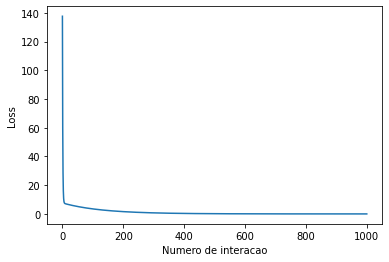

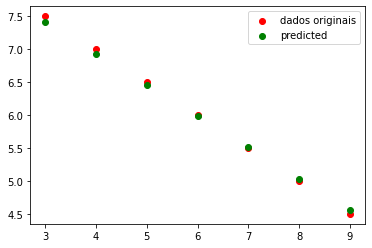

In [5]:
array = [3, 4, 5, 6, 7, 8, 9]
array_np = np.array(array, dtype=np.float32)
array_np = array_np.reshape(-1, 1)
array_2 = [7.5,7,6.5,6.0,5.5,5.0,4.5]
array_2_np = np.array(array_2, dtype=np.float32)
array_2_np = array_2_np.reshape(-1, 1)
var = Variable(torch.from_numpy(array_np))
var_2 = Variable(torch.from_numpy(array_2_np))
###############Criando Classe de Regressao Linear##########################################
class RegressaoLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressaoLinear, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
################Definindo o Modelo#####################3
input_dim = 1
output_dim = 1 
model = RegressaoLinear(input_dim, output_dim)
################DEFININDO MSE####################
mse = nn.MSELoss()
#################Optimizando o modelo#############
# Encontrar parametros que minimizam o erro (famoso fittar)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
###################Treinando o modelo############33
loss_list = []
n_interacao = 1001
for interacao in range(n_interacao):
    optimizer.zero_grad()
    resultados = model(var)
    loss = mse(resultados, var_2)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    
    if(interacao % 50 == 0):
        print('epoch {}, loss {}'.format(interacao, loss.data))
        
plt.plot(range(n_interacao), loss_list)
plt.xlabel('Numero de interacao')
plt.ylabel('Loss')
plt.show()
###################Fazendo Predict#########################
predicted = model(var).data.numpy()
plt.scatter(array, array_2, label = 'dados originais', color='red')
plt.scatter(var, predicted, label = 'predicted', color='green')
plt.legend()
plt.show()

## Regressão Logistica

* Bom para classificação
* Regressao Linear + Funcao Logistica(SoftMax) = Regressao Logistica

1. Preparar o Dataset 

    1.1. MNIST - Imagens 28x28 com labels de 0 a 9
    
    1.2. Nao ta normalizado, então divide-se a imagem por 255
    
    1.3. Crie Train Test em 80/20
    
    1.4. Crie Tensores e Variaveis
    
    1.5. Batch_size são os tramanhos dos grupos de treinamento
    
    1.6 Epoch = 1 significa treinar todos os dados uma vez
    
    1.7 TensorDataset(), Cada amostra é recuperada indexando os tensores em 1 dimensão
    
    1.8 DataLoader(), Combina o dataset e a amostra
    
    1.9 Visualize uma das imagens do dataset
    
2. Criar modelo de Regressão Logistica

3. Configure o modelo
 
    3.1 Input_dim = 2828
    
    3.2 Output_dim = 10
    
4. Função de perda

    4.1 Calcule Cross Entropy Loss
  
5. Optimização
    
    5.1 SGD Optimizer

6. Treine o Modelo

7. Predict

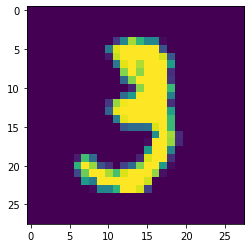

In [6]:
train = pd.read_csv('MNIST_data/mnist_train.csv')
x_numpy = train.loc[:, train.columns != 'label'].values/255
y_numpy = train.label.values

##############Train_test_split#########################

train_x, test_x, train_y, test_y = train_test_split(x_numpy, y_numpy, test_size = 0.2, random_state = 42)

#################Tensores#############################33

x_train = torch.from_numpy(train_x).type(torch.float32)
y_train = torch.from_numpy(train_y).type(torch.LongTensor)
x_test = torch.from_numpy(test_x).type(torch.float32)
y_test = torch.from_numpy(test_y).type(torch.LongTensor)
###########Batch_size$$###########################3

batch_size = 100
n_iters = 10000
n_epochs = n_iters / (len(train_x) / batch_size)
n_epochs = int(n_epochs)

##########Pytorch train e test##############

train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

#########Data Loader###########################3

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

###########Vizualize##################333#

plt.imshow(x_numpy[10].reshape(28,28))
plt.show()

In [7]:
class RegressaoLogistica(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressaoLogistica, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = 28*28
output_dim = 10

model = RegressaoLogistica(input_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Iteration: 500 Loss: 1.5581523180007935 Accuracy: 74.80833435058594%
Iteration: 1000 Loss: 1.254442572593689 Accuracy: 79.64167022705078%
Iteration: 1500 Loss: 1.050283670425415 Accuracy: 81.7249984741211%
Iteration: 2000 Loss: 0.9110954999923706 Accuracy: 82.68333435058594%
Iteration: 2500 Loss: 0.8510586023330688 Accuracy: 83.5250015258789%
Iteration: 3000 Loss: 0.8543800115585327 Accuracy: 84.1500015258789%
Iteration: 3500 Loss: 0.7458102703094482 Accuracy: 84.65833282470703%
Iteration: 4000 Loss: 0.7340488433837891 Accuracy: 85.03333282470703%
Iteration: 4500 Loss: 0.5998623967170715 Accuracy: 85.42500305175781%
Iteration: 5000 Loss: 0.5935794711112976 Accuracy: 85.6500015258789%
Iteration: 5500 Loss: 0.554211437702179 Accuracy: 85.94999694824219%
Iteration: 6000 Loss: 0.7228027582168579 Accuracy: 86.09166717529297%
Iteration: 6500 Loss: 0.5208513140678406 Accuracy: 86.32499694824219%
Iteration: 7000 Loss: 0.6489077806472778 Accuracy: 86.48332977294922%
Iteration: 7500 Loss: 0.3825

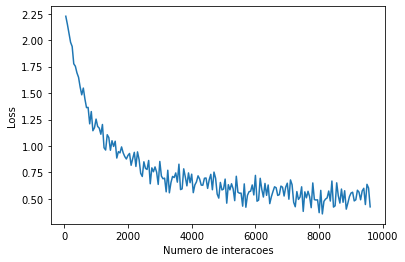

In [8]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(n_epochs):
    for i, (img, labels) in enumerate(train_loader):
        train = Variable(img.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            
            for img, labels in test_loader:
                test = Variable(img.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))
            
plt.plot(iteration_list, loss_list)
plt.xlabel('Numero de interacoes')
plt.ylabel('Loss')
plt.show()


## Artificial Neural Network



In [9]:
class Rede_Neural(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Rede_Neural, self).__init__()
        
        self.f_1 = nn.Linear(input_dim, hidden_dim)
        self.relu_1 = nn.ReLU()
        self.f_2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh_1 = nn.Tanh()
        self.f_3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu_1 = nn.ELU()
        self.f_4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.f_1(x)
        out = self.relu_1(out)
        out = self.f_2(out)
        out = self.tanh_1(out)
        out = self.f_3(out)
        out = self.elu_1(out)
        out = self.f_4(out)
        return out
    
imput_dim = 28*28
hidden_dim = 150
output_dim = 10
model = Rede_Neural(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Iteration: 500 Loss: 0.8335780501365662 Accuracy: 77.7750015258789 %
Iteration: 1000 Loss: 0.44899681210517883 Accuracy: 87.57499694824219 %
Iteration: 1500 Loss: 0.3824537694454193 Accuracy: 90.2750015258789 %
Iteration: 2000 Loss: 0.35228657722473145 Accuracy: 91.25 %
Iteration: 2500 Loss: 0.23278041183948517 Accuracy: 92.08333587646484 %
Iteration: 3000 Loss: 0.3654695153236389 Accuracy: 92.81666564941406 %
Iteration: 3500 Loss: 0.26973456144332886 Accuracy: 93.5 %
Iteration: 4000 Loss: 0.24703161418437958 Accuracy: 94.08333587646484 %
Iteration: 4500 Loss: 0.19898678362369537 Accuracy: 94.42500305175781 %
Iteration: 5000 Loss: 0.1513471007347107 Accuracy: 94.875 %
Iteration: 5500 Loss: 0.1242913231253624 Accuracy: 95.26667022705078 %
Iteration: 6000 Loss: 0.14567549526691437 Accuracy: 95.54166412353516 %
Iteration: 6500 Loss: 0.08388151228427887 Accuracy: 95.66666412353516 %
Iteration: 7000 Loss: 0.13195377588272095 Accuracy: 95.89167022705078 %
Iteration: 7500 Loss: 0.039269547909

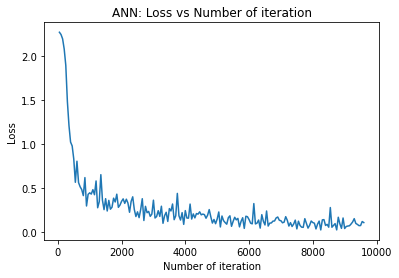

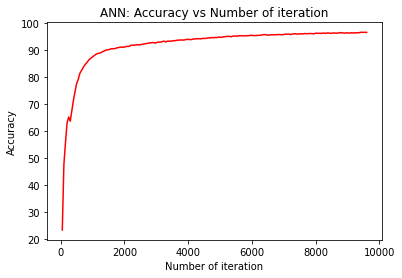

In [10]:
count = 0
loss_list = []
iteraction_list = []
accuracy_list = []

for epoch in range(n_epochs):
    for i, (img, labels) in enumerate(train_loader):
        
        train = Variable(img.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if count % 50 == 0 :
            correct = 0
            total = 0
            for img, labels in test_loader:
                test = Variable(img.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteraction_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data, accuracy))
#################################################################################333
plt.plot(iteraction_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()


plt.plot(iteraction_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## Convolutional Neural Network

* CNN é utilizado para classificar Imagens

1. Convolutional Layer
    
    1.1. Crie mapas de Features com filtros (kernels)
    
    1.2. Padding: após aplicação, as dimensões da imagem original diminuem
    
    1.3. 2 camadas Convulocionais
    
    1.4. Numero de Features map é out_channel = 16
    
    1.5. O tamanho do filtro (kernel) é 2*2
    
2. Pooling Layer
    
    2.1. Preparar um feature map condensado a partir do output convolutional layer
    
    2.2. 2 Pooling layers (max pooling)
    
    2.3. Tamanho do Pooling é 2*2
    
3. Flattening: Achata a Feature map

4. Fully Connected Layer

    4.1. ANN ou uma função linear, mas no fim sempre utiliza-se a função Softmax
    
    4.2. Não utilizaremos uma função de ativação 
    
    4.3. Combina-se a parter Convulocional com a Regressão Logistica para criar a CNN
    
    
5. Crie a Classe do modelo

6. Crie as funções de Loss

7. Criar o Otimizador

8. Treinar e Predict

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cnn_1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu_1 = nn.ReLU()
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2)
        self.cnn_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu_2 = nn.ReLU()
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2)
        self.fully_1 = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        out = self.cnn_1(x)
        out = self.relu_1(out)
        out = self.maxpool_1(out)
        out = self.cnn_2(out)
        out = self.relu_2(out)
        out = self.maxpool_2(out)
        out = out.view(out.size(0), -1)
        out = self.fully_1(out)
        return out
#############################################################################
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

model = CNN()

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Iteration: 500 Loss: 0.2431170791387558 Accuracy: 92.45832824707031 %
Iteration: 1000 Loss: 0.1365143209695816 Accuracy: 95.34166717529297 %
Iteration: 1500 Loss: 0.159558966755867 Accuracy: 96.56666564941406 %
Iteration: 2000 Loss: 0.18023329973220825 Accuracy: 96.76667022705078 %


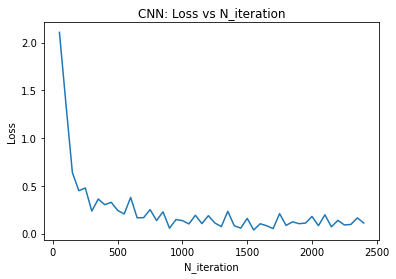

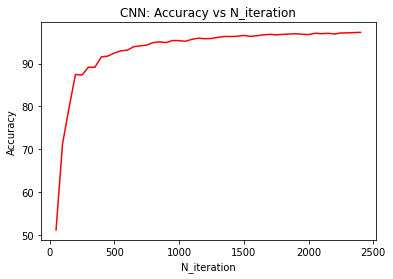

In [20]:
count = 0
loss_list = []
accuracy_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (img, labels) in enumerate(train_loader):
        
        train = Variable(img.view(100,1,28,28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 50 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
                
            accuracy = 100 * (correct / float(total))
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data, accuracy))
            
plt.plot(iteration_list,loss_list)
plt.xlabel("N_iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs N_iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("N_iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs N_iteration")
plt.show()